In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Sales datasets
Name it as df_sales

In [2]:
df_sales = pd.read_excel('Q1_2020.xlsx',sheet_name='Data')

In [3]:
df_sales.head()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019,YoY_Status
0,BINUS ANGGREK,316667200.0,497374200.0,318470700.0,0.005695,-0.359696,ON,EXIST,YOY+PREVIOUS
1,SRENGSENG,352496200.0,312727000.0,281110500.0,-0.202515,-0.101099,ON,EXIST,YOY+PREVIOUS
2,AGPG RESTO & CAFE,NaN,397920500.0,362136800.0,NaN,-0.089927,ON,NOT EXIST,PREVIOUS ONLY
3,KEMANGGISAN,404400050.0,289100000.0,197698350.0,-0.511132,-0.316159,ON,EXIST,YOY+PREVIOUS
4,CEGER,168239200.0,352559700.0,236707200.0,0.406968,-0.328604,ON,EXIST,YOY+PREVIOUS


In [4]:
df_sales.describe()

,2019_Q1,2019_Q4,2020_Q1,YoY,Previous
count,3.700000e+02,3.480000e+02,3.450000e+02,370.000000,348.000000
mean,5.840698e+07,7.917509e+07,6.270028e+07,0.206667,-0.200742
std,4.645449e+07,6.210593e+07,4.741133e+07,1.865223,0.361195
min,6.150000e+05,5.320000e+05,1.380000e+05,-1.000000,-1.000000
25%,2.970621e+07,3.866762e+07,3.058270e+07,-0.391082,-0.324652
50%,4.770450e+07,6.411155e+07,5.345910e+07,-0.120546,-0.224716
75%,7.711020e+07,9.884550e+07,7.487910e+07,0.206523,-0.093940
max,4.044000e+08,4.973742e+08,3.621368e+08,15.895023,3.677349


#### Loading order datasets
Name it as df_order

In [5]:
df_order = pd.read_excel('Q1_2020_Order.xlsx',sheet_name='Data')

In [6]:
df_order.head()

,nama_cabang,total_order,avg_per_purchase,qty_ayam,avg_ayam
0,ACORDION KELAPA GADING,87,8.089770e+05,2130,24.482759
1,AGPG RESTO & CAFE,79,4.584010e+06,7575,95.886076
2,ALAM SUTRA,72,1.896949e+06,2245,31.180556
3,ALTERNATIF SENTUL (AGUS SALIM BEKASI),1,1.339500e+06,30,30.000000
4,ALUR LAUT,82,8.956000e+05,1780,21.707317


#### Merging df_sales and df_order together

In [7]:
df_merge = pd.merge(df_sales,df_order,how='outer',left_on='nama_cabang',right_on='nama_cabang')

In [8]:
df_merge.head()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019,YoY_Status,total_order,avg_per_purchase,qty_ayam,avg_ayam
0,BINUS ANGGREK,316667200.0,497374200.0,318470700.0,0.005695,-0.359696,ON,EXIST,YOY+PREVIOUS,84.0,3.791318e+06,7150.0,85.119048
1,SRENGSENG,352496200.0,312727000.0,281110500.0,-0.202515,-0.101099,ON,EXIST,YOY+PREVIOUS,82.0,3.428177e+06,5465.0,66.646341
2,AGPG RESTO & CAFE,NaN,397920500.0,362136800.0,NaN,-0.089927,ON,NOT EXIST,PREVIOUS ONLY,79.0,4.584010e+06,7575.0,95.886076
3,KEMANGGISAN,404400050.0,289100000.0,197698350.0,-0.511132,-0.316159,ON,EXIST,YOY+PREVIOUS,85.0,2.325863e+06,5065.0,59.588235
4,CEGER,168239200.0,352559700.0,236707200.0,0.406968,-0.328604,ON,EXIST,YOY+PREVIOUS,82.0,2.886673e+06,5090.0,62.073171


#### Replacing Null Value with Zero

In [9]:
df_merge = df_merge.fillna(0)

In [10]:
df_merge.head()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019,YoY_Status,total_order,avg_per_purchase,qty_ayam,avg_ayam
0,BINUS ANGGREK,316667200.0,497374200.0,318470700.0,0.005695,-0.359696,ON,EXIST,YOY+PREVIOUS,84.0,3.791318e+06,7150.0,85.119048
1,SRENGSENG,352496200.0,312727000.0,281110500.0,-0.202515,-0.101099,ON,EXIST,YOY+PREVIOUS,82.0,3.428177e+06,5465.0,66.646341
2,AGPG RESTO & CAFE,0.0,397920500.0,362136800.0,0.000000,-0.089927,ON,NOT EXIST,PREVIOUS ONLY,79.0,4.584010e+06,7575.0,95.886076
3,KEMANGGISAN,404400050.0,289100000.0,197698350.0,-0.511132,-0.316159,ON,EXIST,YOY+PREVIOUS,85.0,2.325863e+06,5065.0,59.588235
4,CEGER,168239200.0,352559700.0,236707200.0,0.406968,-0.328604,ON,EXIST,YOY+PREVIOUS,82.0,2.886673e+06,5090.0,62.073171


### Number of Outlet

#### 2019
Menghitung Jumlah Outlet Pada Periode Okt-Nov 2019

In [11]:
outlet_2019 = df_merge[df_merge['2019_Q4'] > 0].count()
outlet_2019['nama_cabang']

348

#### Q1 of 2020
Menghitung jumlah Outlet Pada Periode Jan-Mar 2020

In [12]:
outlet_2020 = df_merge[df_merge['2020_Q1'] > 0].count()
outlet_2020['nama_cabang']

345

### Most Sales in Q1 of 2020
Cabang Mana Dengan Penjualan Tertinggi?

In [13]:
df_merge[df_merge['qty_ayam'] == df_merge['qty_ayam'].max()][['nama_cabang','qty_ayam','avg_ayam']]

,nama_cabang,qty_ayam,avg_ayam
2,AGPG RESTO & CAFE,7575.0,95.886076


### Top 10 Sales based on qty_ayam in Q1 of 2020
Mengetahui 10 Besar Cabang dengan Penjualan Tertinggi Pada Periode Jan-Mar 2020

In [14]:
df_top10 = df_merge.sort_values(by='qty_ayam',ascending=False).head(10)
df_top10 = df_top10[['nama_cabang','qty_ayam','avg_ayam']]
df_top10['Position'] = list(range(1,11)) 

In [15]:
df_top10

,nama_cabang,qty_ayam,avg_ayam,Position
2,AGPG RESTO & CAFE,7575.0,95.886076,1
0,BINUS ANGGREK,7150.0,85.119048,2
5,PON PIN KEBAYORAN LAMA,6135.0,69.715909,3
6,KREKOT SAMANHUDI,5465.0,61.404494,4
1,SRENGSENG,5465.0,66.646341,5
30,CIPONDOH MAKMUR,5340.0,62.823529,6
4,CEGER,5090.0,62.073171,7
3,KEMANGGISAN,5065.0,59.588235,8
13,KEMANGSARI,4505.0,54.277108,9
8,KEBON KACANG,4425.0,49.719101,10


### Top 10 Highest Growth

In [16]:
df_growth = df_merge[(df_merge['YoY_Status'] == 'PREVIOUS ONLY') | (df_merge['YoY_Status'] == 'YOY+PREVIOUS')]

##### Based on Previous Quarter (Q4 of 2019 vs Q1 of 2020)

In [17]:
df_prev = df_growth.sort_values(by='Previous',ascending=False).head(10)
df_prev = df_prev[['nama_cabang','2019_Q4','2020_Q1','Previous']]
df_prev['Position'] = list(range(1,11)) 

In [18]:
df_prev

,nama_cabang,2019_Q4,2020_Q1,Previous,Position
319,HAJI TEN,4896000.0,22900300.0,3.677349,1
312,PETAMBURAN,13932500.0,36887400.0,1.647579,2
325,PD ARUM (CIPINANG PULO MAJA),10244000.0,23451400.0,1.289282,3
383,SUMATERA JOMBANG (JATISARI BEKASI),2668000.0,5592000.0,1.095952,4
362,KASUARI RAYA (GADING NIAS),13999500.0,23009800.0,0.643616,5
320,LEUWINANGGUNG DEPOK,11758000.0,18799500.0,0.598869,6
300,CILANDAK KKO,19917900.0,29660500.0,0.489138,7
337,GRAND GALAXY BEKASI,15005900.0,22244700.0,0.482397,8
225,GREEN PARK VIEW,32823000.0,45685900.0,0.391887,9
299,SEASON CITY,22323700.0,30582700.0,0.369966,10


##### Based on Last Year's  Q1 (Q1 of 2019 vs Q1 of 2020)

In [19]:
df_yoy = df_growth.sort_values(by='YoY',ascending=False).head(10)
df_yoy = df_yoy[['nama_cabang','2019_Q1','2020_Q1','YoY']]
df_yoy['Position'] = list(range(1,11)) 

In [20]:
df_yoy

,nama_cabang,2019_Q1,2020_Q1,YoY,Position
260,HYBRIDA RAYA (PERJUANGAN RAYA),3456000.0,58389200.0,15.895023,1
289,UTAN PANJANG 4,3884200.0,55243200.0,13.222543,2
189,JL. JOMBANG RAYA-PARIGI (Taman CBD Bintaro),8684000.0,114016000.0,12.129433,3
180,VILLA TAMAN CIBODAS / Prambanan Raya Perum II,5765000.0,67697900.0,10.742914,4
327,MUNCANG (Teluk Mandar) (Nusantara Depok),1953700.0,22936800.0,10.740185,5
343,ARYANA KARAWACI (MALAKA JAYA),2324000.0,24134300.0,9.384811,6
239,BSD CIATER / (MUARA BARU),7118000.0,67602000.0,8.497331,7
333,CILANGKAP BARU (SRENGSENG SAWAH),3134000.0,24784900.0,6.908392,8
184,ARTERI KELAPA DUA,8840850.0,61655600.0,5.973945,9
263,JATIMULYA (KARAWACI),6978700.0,48353200.0,5.928683,10


### Top 10 Highest Decrease

##### Based on Previous Quarter (Q4 of 2019 vs Q1 of 2020)

In [21]:
df_prev1 = df_growth.sort_values(by='Previous',ascending=True).head(10)
df_prev1 = df_prev1[['nama_cabang','2019_Q4','2020_Q1','Previous']]
df_prev1['Position'] = list(range(1,11)) 

In [22]:
df_prev1

,nama_cabang,2019_Q4,2020_Q1,Previous,Position
301,AT TAQWA,19532000.0,1020000.0,-0.947778,1
323,RAWA LELE,25800000.0,3000000.0,-0.883721,2
321,ALTERNATIF SENTUL (AGUS SALIM BEKASI),11208400.0,1339500.0,-0.880491,3
285,UNIS TANGGERANG,35998000.0,5070000.0,-0.859159,4
227,MARGONDA,54277000.0,8110500.0,-0.850572,5
287,SALEMBA TENGAH,27702000.0,5588000.0,-0.798282,6
66,TJ DUREN RAYA,118963600.0,28921600.0,-0.756887,7
193,PORIS 2,32704000.0,7960500.0,-0.756589,8
390,CICADAS GRIYA,532000.0,138000.0,-0.740602,9
342,PETA BARAT (GRISENDA),19780000.0,6112500.0,-0.690976,10


##### Based on Last Year's  Q1 (Q1 of 2019 vs Q1 of 2020)

In [23]:
df_yoy1 = df_growth.sort_values(by='YoY',ascending=True).head(10)
df_yoy1 = df_yoy1[['nama_cabang','2019_Q1','2020_Q1','YoY']]
df_yoy1['Position'] = list(range(1,11)) 

In [24]:
df_yoy1

,nama_cabang,2019_Q1,2020_Q1,YoY,Position
301,AT TAQWA,42115000.0,1020000.0,-0.975781,1
321,ALTERNATIF SENTUL (AGUS SALIM BEKASI),27207200.0,1339500.0,-0.950767,2
193,PORIS 2,101447200.0,7960500.0,-0.921531,3
285,UNIS TANGGERANG,37063000.0,5070000.0,-0.863206,4
323,RAWA LELE,21600000.0,3000000.0,-0.861111,5
227,MARGONDA,57635500.0,8110500.0,-0.859279,6
287,SALEMBA TENGAH,34551350.0,5588000.0,-0.838270,7
286,MASJID ASTRA (Masjid Akbar Kemayoran),44413150.0,8928700.0,-0.798963,8
314,Sudimara,42484550.0,8990800.0,-0.788375,9
390,CICADAS GRIYA,615000.0,138000.0,-0.775610,10


### Top 10 Highest Purchase Per Order

In [25]:
df_top_pur = df_merge.sort_values(by='avg_per_purchase',ascending=False).head(10)
df_top_pur = df_top_pur[['nama_cabang','qty_ayam','avg_ayam','avg_per_purchase']]
df_top_pur['Position'] = list(range(1,11)) 

In [26]:
df_top_pur

,nama_cabang,qty_ayam,avg_ayam,avg_per_purchase,Position
2,AGPG RESTO & CAFE,7575.0,95.886076,4.584010e+06,1
389,GELORA MUDA BERJAYA,38.0,38.000000,4.085500e+06,2
0,BINUS ANGGREK,7150.0,85.119048,3.791318e+06,3
111,MARGONDA RAYA,1510.0,94.375000,3.730962e+06,4
251,LAKESGILUT,1100.0,100.000000,3.459691e+06,5
1,SRENGSENG,5465.0,66.646341,3.428177e+06,6
240,RAWA BINONG (SUCI SUSUKAN),1600.0,100.000000,3.422150e+06,7
23,DEPOK 2 TIMUR,3525.0,88.125000,3.149398e+06,8
4,CEGER,5090.0,62.073171,2.886673e+06,9
5,PON PIN KEBAYORAN LAMA,6135.0,69.715909,2.686485e+06,10


### 10 Lowest Purchase Per Order

In [27]:
df_low_pur = df_merge[df_merge['avg_per_purchase'] > 0]

In [28]:
df_low_pur.tail()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019,YoY_Status,total_order,avg_per_purchase,qty_ayam,avg_ayam
408,SYARPA 1,0.0,0.0,0.0,0.0,0.0,0,0,0,86.0,1.010988e+06,2490.0,28.953488
409,TELUK GONG 1,0.0,0.0,0.0,0.0,0.0,0,0,0,87.0,1.191614e+06,2765.0,31.781609
410,TJ DUREN2,0.0,0.0,0.0,0.0,0.0,0,0,0,87.0,1.124179e+06,2910.0,33.448276
411,UTAN PANJANG 3,0.0,0.0,0.0,0.0,0.0,0,0,0,70.0,7.891886e+05,1510.0,21.571429
412,WTC MANGGA 2,0.0,0.0,0.0,0.0,0.0,0,0,0,62.0,3.041645e+05,620.0,10.000000


In [29]:
df_low_pur = df_low_pur.sort_values(by='avg_per_purchase',ascending=True).head(10)
df_low_pur = df_low_pur[['nama_cabang','qty_ayam','avg_ayam','avg_per_purchase']]
df_low_pur['Position'] = list(range(1,11))

In [30]:
df_low_pur

,nama_cabang,qty_ayam,avg_ayam,avg_per_purchase,Position
395,LIMO RAYA DEPOK ( AT TAQWA ),20.0,6.666667,267566.666667,1
412,WTC MANGGA 2,620.0,10.000000,304164.516129,2
314,Sudimara,280.0,10.000000,321100.000000,3
305,JATILUHUR BEKASI,330.0,9.428571,325034.285714,4
303,RAYA BINONG (TAMAN VILLA BANDARA),935.0,10.872093,331698.837209,5
337,GRAND GALAXY BEKASI,670.0,10.000000,332010.447761,6
317,PADEMANGAN IV,480.0,10.000000,336550.000000,7
347,RAYA BOGOR KM.30 (JATIBENING),130.0,10.000000,341823.076923,8
326,JEMBATAN GAMBANG,735.0,10.068493,342369.863014,9
331,DUTA PELNI,260.0,10.000000,346330.769231,10


### Top 10 Most Active Outlet

In [49]:
df_active = df_merge.sort_values(by='total_order',ascending=False).head(10)
df_active = df_active[['nama_cabang','qty_ayam','avg_ayam','total_order']]
df_active['Position'] = list(range(1,11)) 

In [50]:
df_active

,nama_cabang,qty_ayam,avg_ayam,total_order,Position
84,KRAMAT SENTIONG,2030.0,22.808989,89.0,1
8,KEBON KACANG,4425.0,49.719101,89.0,2
44,SETIA BUDI,2375.0,26.685393,89.0,3
93,JATIPADANG (MENTENG WADAS),2615.0,29.382022,89.0,4
26,MUARA BAHARI,3685.0,41.404494,89.0,5
14,GRAND DEPOK CITY,3380.0,37.977528,89.0,6
407,SETIA BUDI 2,2865.0,32.191011,89.0,7
49,POLTANGAN RAYA PASAR MINGGU (TJ BARAT),2085.0,23.426966,89.0,8
6,KREKOT SAMANHUDI,5465.0,61.404494,89.0,9
248,PALMERAH SLIPI,1385.0,15.738636,88.0,10


### Top 10 Least Active

In [93]:
df_least = df_merge[df_merge['total_order'] > 0]
df_least.tail()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019,YoY_Status,total_order,avg_per_purchase,qty_ayam,avg_ayam
408,SYARPA 1,0.0,0.0,0.0,0.0,0.0,0,0,0,86.0,1.010988e+06,2490.0,28.953488
409,TELUK GONG 1,0.0,0.0,0.0,0.0,0.0,0,0,0,87.0,1.191614e+06,2765.0,31.781609
410,TJ DUREN2,0.0,0.0,0.0,0.0,0.0,0,0,0,87.0,1.124179e+06,2910.0,33.448276
411,UTAN PANJANG 3,0.0,0.0,0.0,0.0,0.0,0,0,0,70.0,7.891886e+05,1510.0,21.571429
412,WTC MANGGA 2,0.0,0.0,0.0,0.0,0.0,0,0,0,62.0,3.041645e+05,620.0,10.000000


In [94]:
df_least = df_least.sort_values(by='total_order', ascending=True).head(10)

In [96]:
df_least = df_least[['nama_cabang','qty_ayam','avg_ayam','total_order','Kondisi']]
df_least['Position'] = list(range(1,11))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df_least

,nama_cabang,qty_ayam,avg_ayam,total_order,Kondisi,Position
389,GELORA MUDA BERJAYA,38.0,38.000000,1.0,ON,1
321,ALTERNATIF SENTUL (AGUS SALIM BEKASI),30.0,30.000000,1.0,ON,2
301,AT TAQWA,30.0,15.000000,2.0,ON,3
395,LIMO RAYA DEPOK ( AT TAQWA ),20.0,6.666667,3.0,ON,4
323,RAWA LELE,100.0,14.285714,7.0,ON,5
352,PRAPATAN GAPLEK (MAYAPADA TOWER 2),105.0,10.500000,10.0,ON,6
287,SALEMBA TENGAH,150.0,15.000000,10.0,ON,7
251,LAKESGILUT,1100.0,100.000000,11.0,ON,8
342,PETA BARAT (GRISENDA),155.0,14.090909,11.0,ON,9
285,UNIS TANGGERANG,165.0,13.750000,12.0,ON,10


In [31]:
df_sales.groupby('YoY_Status').count()

,nama_cabang,2019_Q1,2019_Q4,2020_Q1,YoY,Previous,Kondisi,Kondisi_Q1_2019
YoY_Status,,,,,,,,
NO METHOD,51,48,9,0,48,9,51,51
PREVIOUS ONLY,23,0,17,23,0,17,23,23
YOY+PREVIOUS,322,322,322,322,322,322,322,322


## YoY_Status is divided into 3 categories:
#### No Method        : The outles has been closed
#### Previous Only  : The outlet exists after Q1 of 2019
#### YoY+Previous  : The outlet exists from Q1 of 2019 to Q1 of 2020

In [101]:
df_purchase = df_merge[df_merge['avg_per_purchase']>0]

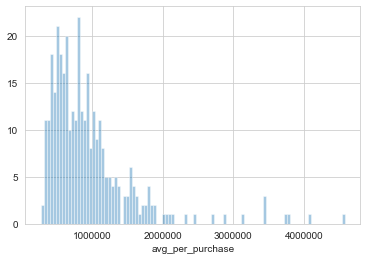

In [102]:
sns.set_style('whitegrid')
sns.distplot(df_purchase['avg_per_purchase'],bins=100,hist=True,kde=False)

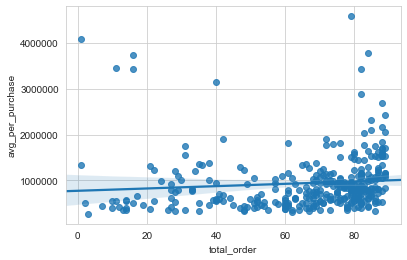

In [104]:
sns.regplot(x='total_order',y='avg_per_purchase',data=df_purchase)

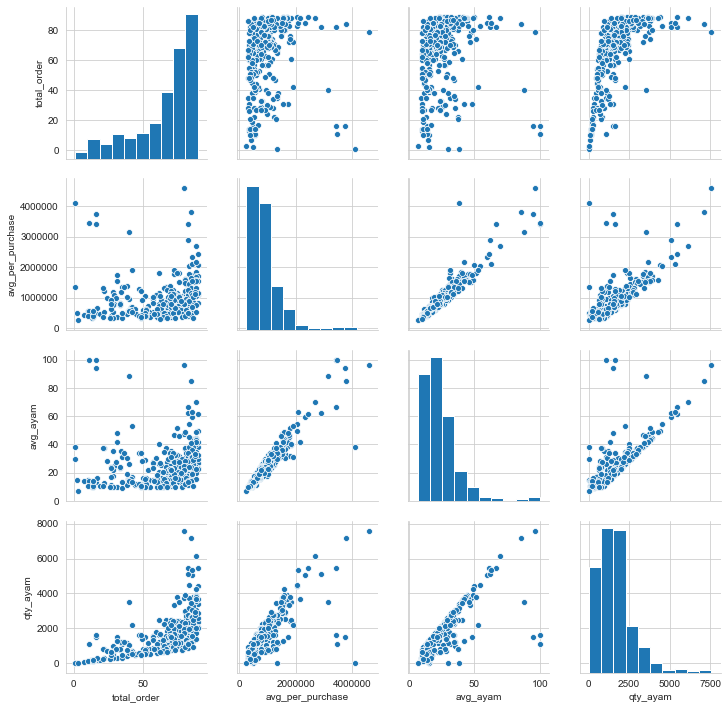

In [107]:
sns.pairplot(df_purchase,vars=['total_order','avg_per_purchase','avg_ayam','qty_ayam'])